<a href="https://colab.research.google.com/github/dittmanndiogo/nlp_model/blob/main/trabalho_nlp_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importações

In [ ]:
import glob
import pandas as pd
import os
import re
from google.colab import files
import nltk
from nltk.corpus import stopwords
import string

# Baixar os recursos necessários do NLTK
nltk.download('stopwords')

import re
!pip install unidecode
from unidecode import unidecode

!git clone https://github.com/roneysco/Fake.br-Corpus.git

!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP


In [ ]:
!ls Fake.br-Corpus

In [ ]:
%cd Fake.br-Corpus/full_texts
!ls


###Processamento - Fake e Fake meta

In [ ]:
current_folder = 'fake'

folder_path = current_folder

file_list = glob.glob(f'{folder_path}/*.txt')

for file_path in file_list:
    print(file_path)


In [7]:
current_folder = 'fake-meta-information'

folder_path = current_folder

# Lista de arquivos dentro da pasta "fake-meta-information"
file_list = glob.glob(f'{folder_path}/*.txt')

meta_data = []

file_numbers = []

# Percorrendo os arquivos na pasta "fake-meta-information"
for file_path in file_list:
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        # Removendo espaços em branco e quebras de linha
        lines = [line.strip() for line in lines]

        meta_data.append(lines)

        file_numbers.append(re.search(r'(\d+)', os.path.basename(file_path)).group(1))

# Definindo as colunas do DataFrame
columns = [
    'author', 'link', 'category', 'date_of_publication', 'number_of_tokens',
    'number_of_words_without_punctuation', 'number_of_types', 'number_of_links_inside_the_news',
    'number_of_words_in_upper_case', 'number_of_verbs', 'number_of_subjuntive_and_imperative_verbs',
    'number_of_nouns', 'number_of_adjectives', 'number_of_adverbs', 'number_of_modal_verbs',
    'number_of_singular_first_and_second_personal_pronouns', 'number_of_plural_first_personal_pronouns',
    'number_of_pronouns', 'pausality', 'number_of_characters', 'average_sentence_length',
    'average_word_length', 'percentage_of_news_with_spelling_errors', 'emotiveness', 'diversity'
]


meta_df = pd.DataFrame(meta_data, columns=columns)

meta_df['file_number'] = file_numbers

meta_df['id'] = meta_df['file_number'] + '-FAKE'

meta_df['tag'] = 'FAKE'



In [ ]:
current_folder = 'fake'

folder_path = current_folder

file_list = glob.glob(f'{folder_path}/*.txt')

fake_text_data = []

file_numbers = []

for file_path in file_list:
    try:
        # Ler o conteúdo do arquivo
        with open(file_path, 'r', encoding='utf-8') as file:
            file_content = file.read()

        # Adicionar o conteúdo à lista de dados
        fake_text_data.append({'full_text': file_content})

        # Adicionar o número do arquivo à lista de números de arquivos
        file_numbers.append(re.search(r'(\d+)', os.path.basename(file_path)).group(1))
    except Exception as e:
        print(f"Erro ao ler o arquivo {file_path}: {str(e)}")

fake_text_df = pd.DataFrame(fake_text_data)

fake_text_df['file_number'] = file_numbers

print(fake_text_df.head())


In [ ]:
# Juntar os DataFrames usando a coluna 'file_number' como chave de junção
fake_merged = pd.merge(meta_df, fake_text_df, on='file_number', how='inner')

# Visualizar as primeiras linhas do DataFrame resultante
display(fake_merged.head())

In [ ]:
# Pasta atual
current_folder = 'true'

# Caminho para a pasta atual
folder_path = current_folder

# Lista de arquivos dentro da pasta "fake"
file_list = glob.glob(f'{folder_path}/*.txt')

# Imprimir os nomes dos arquivos
for file_path in file_list:
    print(file_path)


###Processamento - True e True meta

In [11]:
# Pasta atual
current_folder = 'true'

# Caminho para a pasta atual
folder_path = current_folder

# Lista de arquivos dentro da pasta "true"
file_list = glob.glob(f'{folder_path}/*.txt')

# Lista para armazenar os dados de todos os textos na pasta "true"
true_text_data = []

# Lista para armazenar os números dos arquivos
file_numbers = []

# Percorrer os arquivos dentro da pasta "true"
for file_path in file_list:
    try:
        # Ler o conteúdo do arquivo
        with open(file_path, 'r', encoding='utf-8') as file:
            file_content = file.read()

        # Adicionar o conteúdo à lista de dados
        true_text_data.append({'full_text': file_content})

        # Adicionar o número do arquivo à lista de números de arquivos
        file_numbers.append(re.search(r'(\d+)', os.path.basename(file_path)).group(1))
    except Exception as e:
        print(f"Erro ao ler o arquivo {file_path}: {str(e)}")

# Criar DataFrame para os textos na pasta "true"
true_text_df = pd.DataFrame(true_text_data)

# Adicionar a coluna com os números dos arquivos
true_text_df['file_number'] = file_numbers


# Visualizar as primeiras linhas do DataFrame
print(true_text_df.head())


                                           full_text file_number
0  Câmera registrou queda de helicóptero que mato...        1130
1  Executivo, Legislativo e TCE do RJ formaram or...        2328
2  Segunda-feira, 5 de março de 2018. Boa noite! ...        1999
3  Estabilidade é principal argumento de voto pró...        2592
4  Moro nega pedido da defesa de Lula para fazer ...        1447


In [ ]:
import pandas as pd
import glob
import os
import re

# Pasta atual
current_folder = 'true-meta-information'

# Caminho para a pasta atual
folder_path = current_folder

# Lista de arquivos dentro da pasta "true-meta-information"
file_list = glob.glob(f'{folder_path}/*.txt')

# Lista para armazenar os dados de todos os metadados
meta_data = []

# Lista para armazenar os números dos arquivos
file_numbers = []

# Percorrendo os arquivos na pasta "true-meta-information"
for file_path in file_list:
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        # Removendo espaços em branco e quebras de linha
        lines = [line.strip() for line in lines]

        # Adicionando os dados à lista de metadados
        meta_data.append(lines)

        file_numbers.append(re.search(r'(\d+)', os.path.basename(file_path)).group(1))


columns = [
    'author', 'link', 'category', 'date_of_publication', 'number_of_tokens',
    'number_of_words_without_punctuation', 'number_of_types', 'number_of_links_inside_the_news',
    'number_of_words_in_upper_case', 'number_of_verbs', 'number_of_subjuntive_and_imperative_verbs',
    'number_of_nouns', 'number_of_adjectives', 'number_of_adverbs', 'number_of_modal_verbs',
    'number_of_singular_first_and_second_personal_pronouns', 'number_of_plural_first_personal_pronouns',
    'number_of_pronouns', 'pausality', 'number_of_characters', 'average_sentence_length',
    'average_word_length', 'percentage_of_news_with_spelling_errors', 'emotiveness', 'diversity'
]

true_meta_df = pd.DataFrame(meta_data, columns=columns)

true_meta_df['file_number'] = file_numbers

# Adicionando a coluna 'id' ao DataFrame
true_meta_df['id'] = true_meta_df['file_number'] + '-TRUE'

# Adicionando a coluna 'tag' com o valor 'TRUE' em todas as linhas
true_meta_df['tag'] = 'TRUE'



display(true_meta_df.head())


In [ ]:
# Juntar os DataFrames usando a coluna 'file_number' como chave de junção
true_merged = pd.merge(true_meta_df, true_text_df, on='file_number', how='inner')

# Visualizar as primeiras linhas do DataFrame resultante
display(true_merged.head())

In [ ]:
# Concatenar os DataFrames fake_merged e true_merged
complete_df = pd.concat([fake_merged, true_merged], ignore_index=True)

# Exportar o DataFrame para um arquivo CSV
complete_df.to_csv('complete_data.csv', index=False)

# Baixar o arquivo CSV para a sua máquina local
# files.download('complete_data.csv')

# Visualizar as primeiras linhas do DataFrame resultante
display(complete_df.head(5))

###Removendo acentos, números e demais caracteres especiais e stopwords

In [ ]:
#ALUNO: DIOGO DITTMANN - RU 3679557

# Obter lista de stopwords em português
stop_words = set(stopwords.words('portuguese'))

# Função para limpar o texto
def clean_text(text):
    text = text.lower()
    text = unidecode(text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

def clean_full_text(text):
    text = text.lower()
    text = unidecode(text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text


complete_df['stop_words'] = complete_df['full_text'].apply(clean_text)
complete_df['full_text'] = complete_df['full_text'].apply(clean_full_text)

display(complete_df.head())

###Realizando a criação dos Tokens

In [16]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenizar a coluna 'full_text'
complete_df['tokens'] = complete_df['full_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


###Realizando o steeming

In [ ]:
from nltk.stem import RSLPStemmer
nltk.download('rslp')

# Inicializar o stemmer
stemmer = RSLPStemmer()

# Função para aplicar o stemming em um texto
def stem_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

# Aplicar a função de stemming à coluna 'full_text'
complete_df['stop_words'] = complete_df['stop_words'].apply(stem_text)

display(complete_df.head())


##Separando os Dataframes para normalização

In [ ]:
#ALUNO: DIOGO DITTMANN - RU 3679557
import pandas as pd
from nltk.tokenize import word_tokenize

# Calcular o comprimento médio dos textos para textos verdadeiros e falsos
true_mean_length = complete_df[complete_df['tag'] == 'TRUE']['full_text'].apply(lambda x: len(word_tokenize(str(x)))).mean()
fake_mean_length = complete_df[complete_df['tag'] == 'FAKE']['full_text'].apply(lambda x: len(word_tokenize(str(x)))).mean()

# Determinar o comprimento máximo para truncamento
max_length = int(max(true_mean_length, fake_mean_length))

# Função para truncar o texto
def truncate_text(text, max_length):
    return ' '.join(text.split()[:max_length])

# Truncar os textos para o comprimento máximo
complete_df['truncated_text'] = complete_df['full_text'].apply(lambda x: truncate_text(str(x), max_length))

# Visualizar o DataFrame resultante
print(complete_df.head())


In [ ]:
new_df = complete_df[['tag', 'truncated_text']].copy()

# Renomear a coluna 'label' para 'preprocessed_news'
new_df.rename(columns={'tag': 'label'}, inplace=True)
new_df.rename(columns={'truncated_text': 'processed_text'}, inplace=True)

# Transformar todos os itens da coluna 'label' em minúsculas
new_df['label'] = new_df['label'].str.lower()

# Visualizar o novo DataFrame
display(new_df.head())

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializar o TfidfVectorizer com ngram_range de 1 a 3
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Ajustar e transformar os dados de texto para criar a matriz TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(new_df['processed_text'])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, new_df['label'], test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Criar o modelo de regressão logística
log_reg_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Treinar o modelo nos dados de treinamento
log_reg_model.fit(X_train, y_train)


##Predição dos textos

In [ ]:
# Realizar predição dos textos de teste
proba_predictions = log_reg_model.predict_proba(X_test)
print(proba_predictions)

In [24]:
from sklearn.metrics import accuracy_score

# Fazer previsões nos dados de teste
y_pred = log_reg_model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)


Acurácia: 0.9511111111111111


In [ ]:
# Filtrar os dados verdadeiros e falsos com base na coluna "label"
true_data = new_df[new_df['label'] == 'true']
fake_data = new_df[new_df['label'] == 'fake']

# Extrair os textos dos dados verdadeiros e falsos
true_texts = true_data['processed_text']
fake_texts = fake_data['processed_text']

print(true_data)


##Gerando a nuvem dos dados verdadeiros

In [ ]:
# Função para remover stopwords e pontuações
def preprocess_text(text):
    if isinstance(text, str):  # Verifique se é uma string
        stop_words = set(stopwords.words('portuguese'))
        punctuation = set(string.punctuation)
        tokens = word_tokenize(text)
        cleaned_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.lower() not in punctuation]
        return cleaned_tokens
    else:
        return []  # Retorna uma lista vazia se não for uma string

# Aplicar pré-processamento ao texto
true_data['processed_text'] = true_data['processed_text'].apply(preprocess_text)

# Inicializar um dicionário vazio para contar as ocorrências
true_words_dict = {}

for index, row in true_data.iterrows():
    for token in row['processed_text']:
        if token in true_words_dict:
            true_words_dict[token] += 1
        else:
            true_words_dict[token] = 1

print(true_words_dict)

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0
Receiving objects: 100% (34/34), 1.27 MiB | 16.93 MiB/s, done.
Resolving deltas: 100% (9/9), done.
mv: cannot move './NLP/data' to './data': Directory not empty
   * Um total de 69834 tokens foram computadas a partir do conjunto de dados.



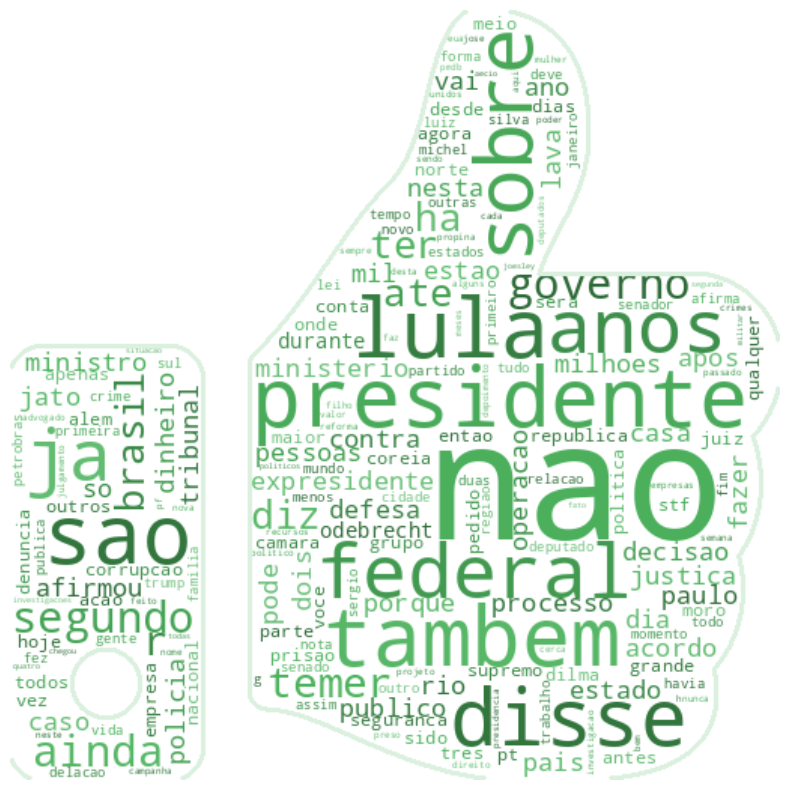

(<wordcloud.wordcloud.WordCloud at 0x7cd6c360aec0>, 69834)

In [47]:
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP


from funcoes_auxiliares import gerar_nuvem_palavras
gerar_nuvem_palavras(dicionario_tokens_e_frequencia=true_words_dict,
                      arquivo_mascara='thumbs_up_mask.png')

##Gerando a nuvem dos dados falsos

In [ ]:
# Função para remover stopwords e pontuações
def preprocess_text(text):
    if isinstance(text, str):  # Verifique se é uma string
        stop_words = set(stopwords.words('portuguese'))
        punctuation = set(string.punctuation)
        tokens = word_tokenize(text)
        cleaned_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.lower() not in punctuation]
        return cleaned_tokens
    else:
        return []  # Retorna uma lista vazia se não for uma string

# Aplicar pré-processamento ao texto
fake_data['processed_text'] = fake_data['processed_text'].apply(preprocess_text)

# Inicializar um dicionário vazio para contar as ocorrências
fake_words_dict = {}

for index, row in fake_data.iterrows():
    for token in row['processed_text']:
        if token in fake_words_dict:
            fake_words_dict[token] += 1
        else:
            fake_words_dict[token] = 1

print(fake_words_dict)

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0
Receiving objects: 100% (34/34), 1.27 MiB | 16.30 MiB/s, done.
Resolving deltas: 100% (9/9), done.
mv: cannot move './NLP/data' to './data': Directory not empty
   * Um total de 33320 tokens foram computadas a partir do conjunto de dados.



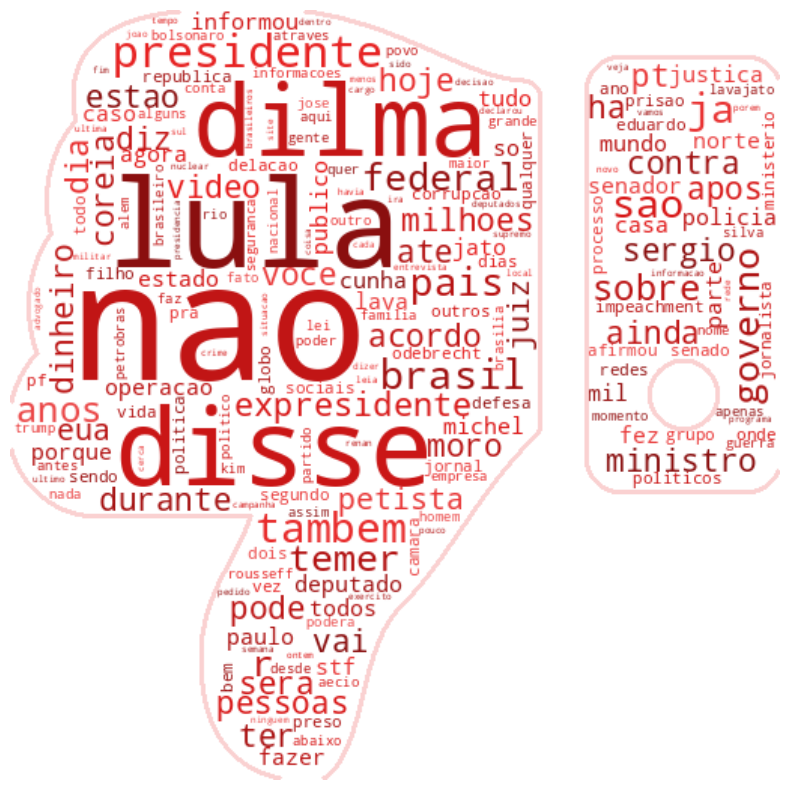

(<wordcloud.wordcloud.WordCloud at 0x7cd695d8fdf0>, 33320)

In [51]:
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP


from funcoes_auxiliares import gerar_nuvem_palavras
gerar_nuvem_palavras(dicionario_tokens_e_frequencia=fake_words_dict,
                      arquivo_mascara='thumbs_down_mask.png')